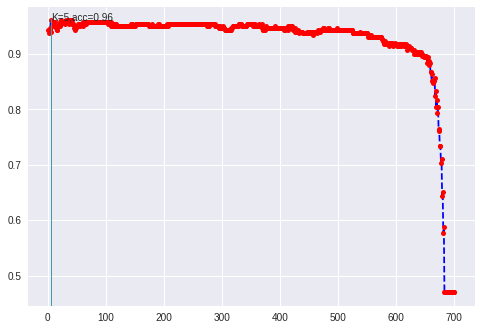

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

df = pd.read_csv("knn_test_data", index_col=0)

# 1. 获取X和y
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

# 2. 标准化df的数据部分内容
X_arr = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_arr,columns=df.columns[:-1])

# 3. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.30)

# 4. 创建KNN模型
K=np.arange(1,701)
PredictList = []

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    # 5. 获得算法的准确率
    acc=knn.score(X_test,y_test) # <--- 判断此knn模型的准确率
    #print("当K=",K,"的时候此knn模型的准确率为",acc)
    PredictList.append(acc)

PredictList = np.array(PredictList)
#print(PredictList.shape)

#繪圖
#plt.style.use('seaborn')   # 使用美化的seaborn风格
plt.plot(K,PredictList,
        linestyle='dashed', color='blue', 
        marker='o',markerfacecolor='red', markersize=5)

#聯合K和PredictList
link = pd.Series(PredictList,index = K)
#尋找最大值及對應坐標
def MAX(link):
    for IndexValues in link.index.values:
        if link[IndexValues] == link.max():
            return IndexValues,link.max()
In,Va = MAX(link)
plt.axvline(x=In,ymin=0, ymax=Va,linewidth=1, color='#4798b3')
plt.text(In, Va,f'K={In},acc={Va}')
        
plt.show()